# Process eigenvalues and eigenvectors
The title of the notebook should be coherent with file name. Namely, file name should be:    
*author's initials_progressive number_title.ipynb*    
For example:    
*EF_01_Data Exploration.ipynb*

## Purpose
State the purpose of the notebook.

## Methodology
Quickly describe assumptions and processing steps.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- todo 1;
- todo 2;
- todo 3.

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import os
import glob

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

### Change directory
If Jupyter lab sets the root directory in `notebooks`, change directory.

In [2]:
if "notebook" in os.getcwd():
    os.chdir("..")

## Local library import
We import all the required local libraries libraries

In [3]:
# Include local library paths
import sys
sys.path.append("./src") # uncomment and fill to import local libraries

# Import local libraries
import src.utilities as utils

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

In [4]:
EIGENVECTOR_FILEPATH = "data/processed/eigenvector_024"
config = utils.read_config()

plt.style.use(config['viz']['jupyter'])


# Data import
We retrieve all the required data for the analysis.

In [5]:
eigenvector = np.loadtxt(EIGENVECTOR_FILEPATH)


In [19]:
# eigenvector_filepaths = sorted(glob.glob('data/processed/eigenvector_???'))
eigenvector_filepath = "data/processed/eigenvector_{:03}"
eigenvectors = {mode_num : np.loadtxt(eigenvector_filepath.format(mode_num)) for mode_num in range(7,25)}

# Data processing
Put here the core of the notebook. Feel free to further split this section into subsections.

### Renormalize each row/column vector of mode eigenvector
**Note** The motion's amplitude inforamtion is lost.

In [7]:
# Renormalize eigenvectors
# for key in eigenvectors.keys():
#     eigenvector = eigenvectors[key]
#     for row_idx in range(eigenvector.shape[0]):
#         eigenvector[row_idx] = eigenvector[row_idx] / np.linalg.norm(eigenvector[row_idx])

In [8]:
np.cross(eigenvector[2], eigenvector[3])

array([0.      , 0.665858, 0.665858])

In [9]:
def calcualte_dotprod(eigenvector):
    no_beads = np.shape(eigenvector)[0]
    dotprod = np.zeros((no_beads, no_beads))

    for i in np.arange(no_beads):
        for j in np.arange(i+1): 
            dotprod[i][j] = np.dot(eigenvector[i], eigenvector[j])

    dotprod = dotprod + dotprod.T
    return dotprod

def calcualte_crossprod_norm(eigenvector):
    no_beads = np.shape(eigenvector)[0]
    crossprod_norm = np.zeros((no_beads, no_beads))

    for i in np.arange(no_beads):
        for j in np.arange(i+1):
            crossprod_norm[i][j] = np.linalg.norm(np.cross(eigenvector[i], eigenvector[j]))

    crossprod_norm = crossprod_norm + crossprod_norm.T
    return crossprod_norm

# Data visualization
Visualize processed data

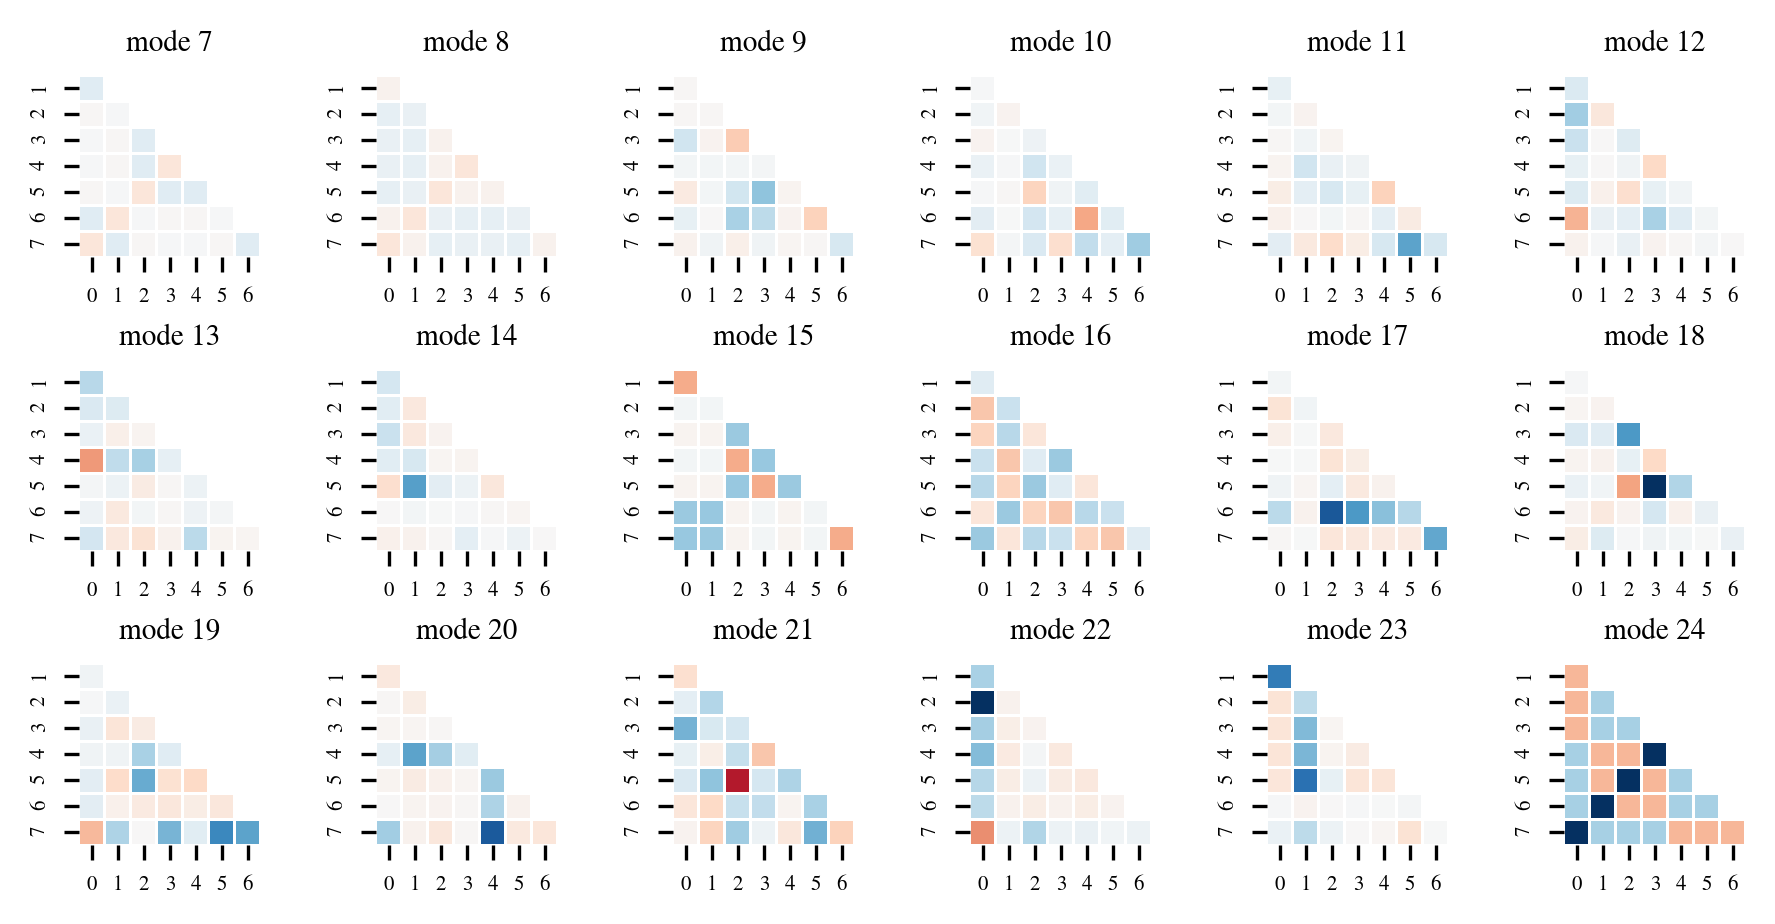

In [21]:
def plot_crosscor(array, vmin=0, center=None, vmax=1, axis=None, cmap=plt.cm.RdBu_r, annot=True):
    array = array[1:, :-1]
    mask = np.zeros_like(array)
    mask[np.triu_indices_from(mask, k=1)] = True

    sns.heatmap(array, fmt='.2f', linewidths=.5, vmin=vmin, center=center, vmax=vmax, square=True, mask=mask, annot=annot, cmap=cmap, cbar=False, ax=axis)
    y_ticks = axis.get_yticks()
    y_ticks = [int(tick +0.5) for tick in y_ticks]
    axis.set_yticklabels(y_ticks)

    return None

subplot_rows = 3
subplot_columns = 6
with plt.rc_context({'font.size': 4, 'xtick.labelsize': 5, 'ytick.labelsize': 5, 'axes.titlesize': 7}):
    _, axs = plt.subplots(subplot_rows, subplot_columns)
    mode_num = 7
    for i in range(subplot_rows):
        for j in range(subplot_columns):
            dotprod = calcualte_dotprod(eigenvectors[mode_num])
            plot_crosscor(dotprod, vmin=-1, center=0, vmax=1, cmap=plt.cm.RdBu_r, axis=axs[i, j], annot=False)

            axs[i, j].set_title("mode {}".format(mode_num))
            mode_num += 1

    plt.tight_layout()

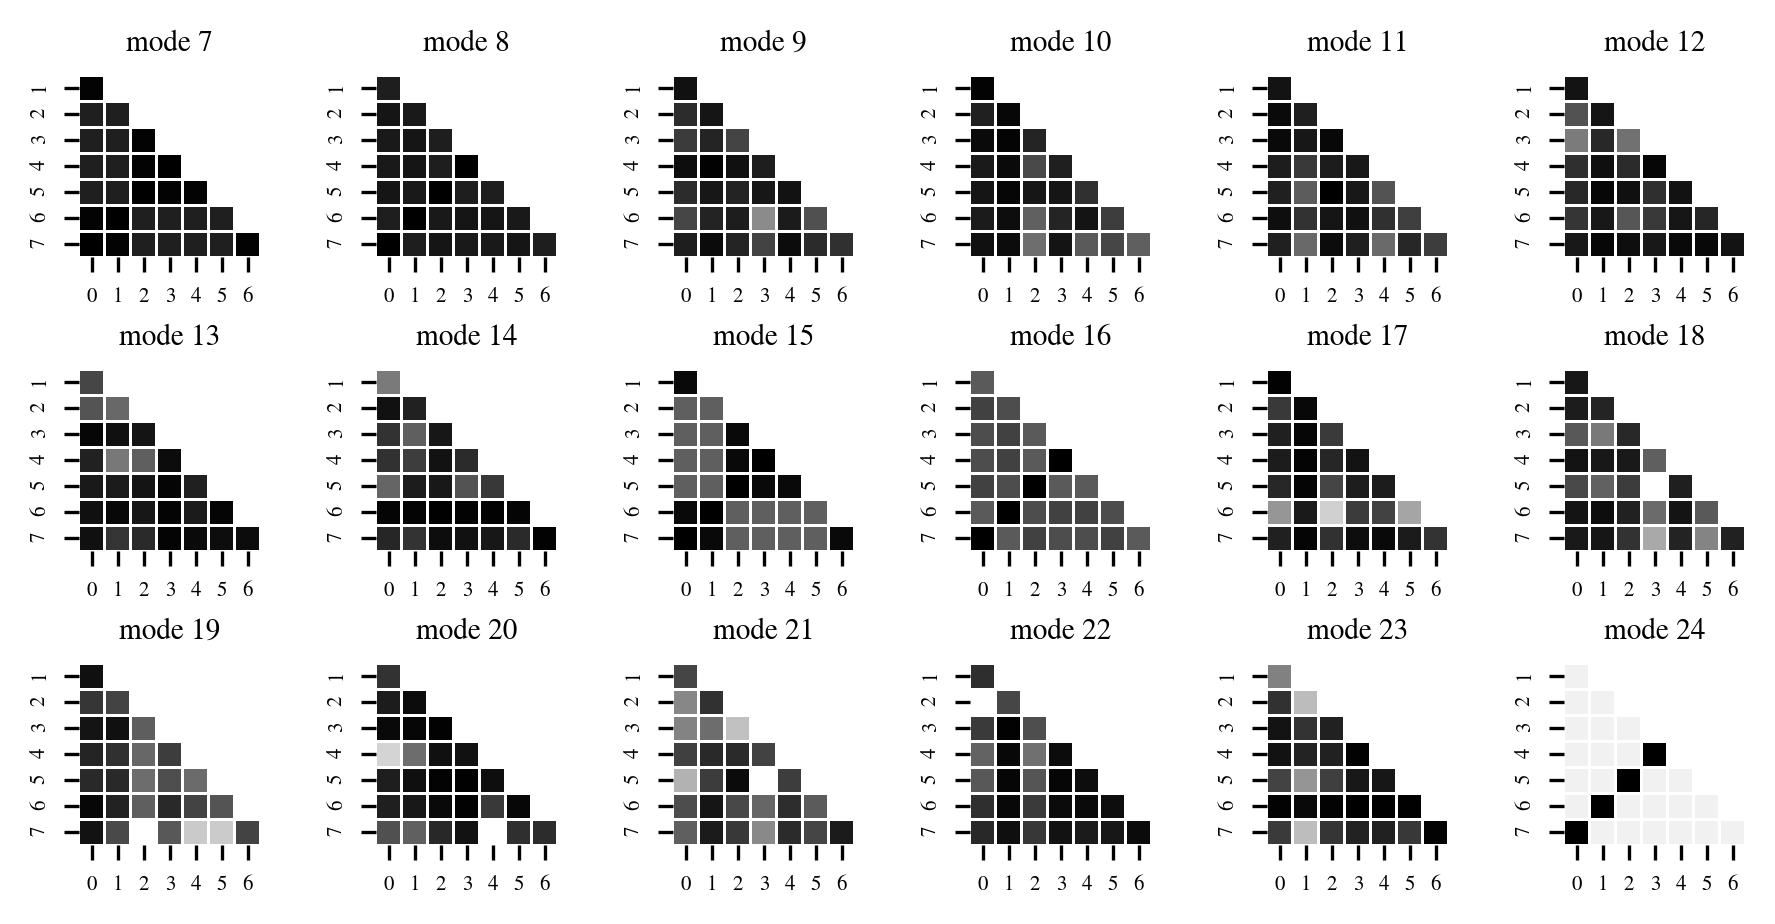

In [22]:
with plt.rc_context({'font.size': 4, 'xtick.labelsize': 5, 'ytick.labelsize': 5, 'axes.titlesize': 7}):
    _, axs = plt.subplots(subplot_rows, subplot_columns)
    mode_num = 7
    for i in range(subplot_rows):
        for j in range(subplot_columns):
            corossprod_norm = calcualte_crossprod_norm(eigenvectors[mode_num])
            plot_crosscor(corossprod_norm, vmin=0, center=None, vmax=1, cmap=plt.cm.gray, axis=axs[i, j], annot=False)

            axs[i, j].set_title("mode {}".format(mode_num))
            mode_num += 1

    plt.tight_layout()

In [12]:
eigenvectors[7]

array([[-0.017,  0.258, -0.241],
       [-0.017, -0.258,  0.241],
       [ 0.017,  0.258,  0.241],
       [ 0.017, -0.258, -0.241],
       [ 0.017, -0.258, -0.241],
       [ 0.017,  0.258,  0.241],
       [-0.017, -0.258,  0.241],
       [-0.017,  0.258, -0.241]])

# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2